<a href="https://colab.research.google.com/github/jamieth0405/MAT421/blob/main/Module_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 2 - Jamie Dinh

17.1 Interpolation Problem Statement

- Interpolation is the method used to define functions that estimate values between known data points.
- Unlike regression, interpolation does not rely on an underlying model for the data and assumes the points are connected smoothly, reflecting the nature of the process that generated the data.

Given a set of independent variables (𝒙ᵢ) and their corresponding dependent values (𝑦ᵢ), interpolation involves finding a function that passes through all given points. The function can later be used to estimate the estimator 𝒚̂(𝒙\*) for any new input 𝒙* within the range of the data.

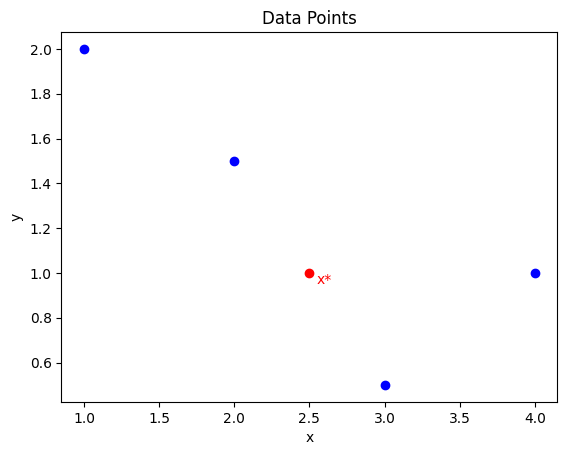

In [ ]:
import matplotlib.pyplot as plt

# Data points
x = [1, 2, 3, 4]
y = [2, 1.5, 0.5, 1]
x_star = 2.5
# Plot
plt.scatter(x, y, color = 'blue', label = 'Data Points')
plt.scatter([x_star], [1], color = 'red', label = 'Interpolation Point (x*)')
plt.text(x_star + 0.05, 0.95, 'x*', color = 'red', fontsize = 10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points')
plt.show()

17.2 Linear Interpolation

- In linear interpolation, the estimated point is assumed to lie on the straight line connected by its closest points to the left and right.
- For a given x within the range [𝒙ᵢ, 𝒙ᵢ+1], the formula used is: 𝐲̂(𝑥) = 𝑦ᵢ + [(𝑦ᵢ+1 - 𝑦ᵢ)(𝒙 - 𝒙ᵢ)] / [𝒙ᵢ+1 - 𝒙ᵢ]





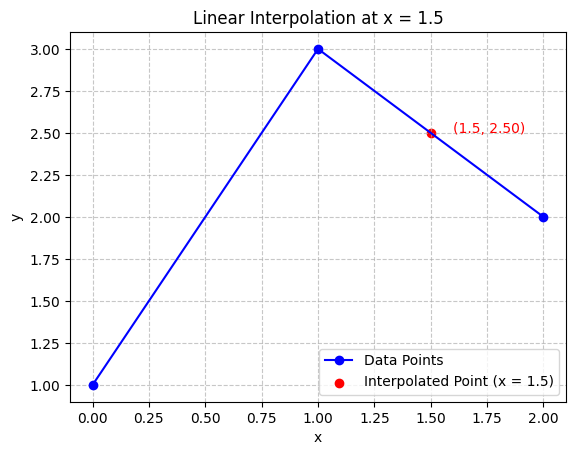

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Data points
x = [0, 1, 2]
y = [1, 3, 2]
# Define the interpolation function
f = interp1d(x, y)
# Interpolation at x = 1.5
x_interp = 1.5
y_interp = f(x_interp)
# Plot the data points
plt.plot(x, y, 'o-b', label = 'Data Points')  # Original data points connected by lines
plt.scatter(x_interp, y_interp, color = 'red', label = f'Interpolated Point (x = {x_interp})')  # Interpolated point
# Add labels and title
plt.title('Linear Interpolation at x = 1.5')
plt.xlabel('x')
plt.ylabel('y')
# Annotate the interpolated point
plt.text(x_interp + 0.1, y_interp, f'({x_interp}, {y_interp:.2f})', fontsize = 10, color = 'red')
# Add legend
plt.legend()
# Show the plot
plt.grid(linestyle = '--', alpha = 0.7)
plt.show()


The interpolated value is 𝑦(1.5) = 2.5, as verified using Python's *scipy.interpolate.interp1d.*

17.3 Cubic Spline Interpolation

- Cubic Spline Interpolation is the method used to connect data points smoothly using a set of piecewise cubic functions.
- For 𝑛 data points, there are 𝑛 - 1 cubic functions, each of the form: Sᵢ(𝒙) = aᵢ𝒙^3 + bᵢ𝒙^2 + cᵢ𝒙 + dᵢ
- Each function requires four coefficients (aᵢ, bᵢ, cᵢ, dᵢ), resulting in 4(𝑛 - 1) unknowns.

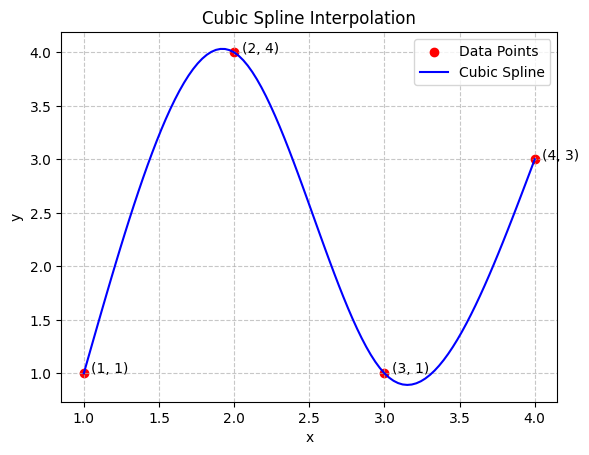

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Data points
x = [1, 2, 3, 4]
y = [1, 4, 1, 3]
# Create cubic spline with natural boundary conditions
cs = CubicSpline(x, y, bc_type = 'natural')
# Generate fine-grained x values for a smooth curve
x_smooth = np.linspace(min(x), max(x), 100)
y_smooth = cs(x_smooth)
# Plot the original data points
plt.scatter(x, y, color = 'red', label = 'Data Points')
# Plot the cubic spline
plt.plot(x_smooth, y_smooth, label = 'Cubic Spline', color = 'blue')
# Add labels and title
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')

# Annotate data points
for xi, yi in zip(x, y):
    plt.text(xi + 0.05, yi, f'({xi}, {yi})', fontsize = 10)
# Add a legend
plt.legend()
# Show the plot
plt.grid(linestyle='--', alpha=0.7)
plt.show()

The following conditions are applied:

- Each cubic function passes through its endpoints.
- First and second derivatives match at the points where the cubic functions meet.
- Extra constraints are added at the endpoints, often assuming the second derivative is zero (natural cubic splines).